In [1]:
#%run main.py
# in the specifications (adult.names): Unknown values are replaced with the character '?'

import pandas as pd

def prepare_datasets():
    header = ['age','workclass','fnlwgt','education','education-num',
              'marital-status','occupation','relationship','race','sex',
              'capital-gain','capital-loss','hours-per-week','native-country','income']
    train = pd.read_table("adult.data", sep=r',\s', na_values='?', header=None, names=header).dropna()
    evaluate = pd.read_table("adult.test", sep=r',\s', na_values='?', skiprows=[0], header=None, names=header).dropna()
    return train, evaluate

df_train, df_evaluate = prepare_datasets()

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [2]:
df_train.shape

(30162, 15)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#df_train.select_dtypes(exclude=['object'])#.insert(#+df_train["income"]
#df_train.info()

In [5]:
# only keep non-categorical values but keeping the income catagory
# careful with the income category not the same in train and test sets
df_train = df_train.select_dtypes(exclude=['object']).join(df_train.income.replace("<=50K",0).replace(">50K",1))
df_evaluate = df_evaluate.select_dtypes(exclude=['object']).join(df_evaluate.income.replace("<=50K.",0).replace(">50K.",1))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train[list(df_train.columns)[:-1]],df_train[list(df_train.columns)[-1]],test_size=0.2,random_state=1)

X_evaluate = df_evaluate[list(df_evaluate.columns)[:-1]]
y_evaluate = df_evaluate[list(df_evaluate.columns)[-1]]

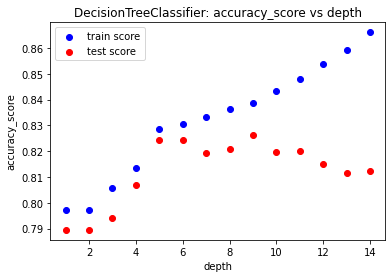

In [7]:
# run a decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

parameter_dtree_min = 1
parameter_dtree_max = 15
preds_dtree_train=[]
preds_dtree_test=[]
for depth in range(parameter_dtree_min,parameter_dtree_max):
    cl_dtree = DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=depth)
    dtree_model = cl_dtree.fit(X_train,y_train)
    y_hat_dtree_train = dtree_model.predict(X_train)
    y_hat_dtree_test = dtree_model.predict(X_test)
    preds_dtree_train.append(accuracy_score(y_train,y_hat_dtree_train))
    preds_dtree_test.append(accuracy_score(y_test,y_hat_dtree_test))
    #print(depth,"Train accuracy_score",preds_train[-1])
    #print(depth,"Test accuracy_score",preds_test[-1],"\n")
    
plt.scatter(range(parameter_dtree_min,parameter_dtree_max),preds_dtree_train,c="b",label="train score")
plt.scatter(range(parameter_dtree_min,parameter_dtree_max),preds_dtree_test,c="r",label="test score")
plt.legend(loc="upper left")
plt.title('DecisionTreeClassifier: accuracy_score vs depth')
plt.xlabel('depth')
plt.ylabel('accuracy_score')
plt.savefig('DecisionTreeClassifier.png')
plt.show()

In [8]:
#present depth with best score for evaluation dataset
max_dtree_index = preds_dtree_test.index(max(preds_dtree_test))
best_depth = list(range(parameter_dtree_min,parameter_dtree_max))[max_dtree_index]
cl_dtree = DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=best_depth)
dtree_model = cl_dtree.fit(X_train,y_train)
y_hat_dtree_train = dtree_model.predict(X_train)
y_hat_dtree_test = dtree_model.predict(X_test)
y_hat_dtree_evaluate = dtree_model.predict(X_evaluate)
print("depth="+str(best_depth),"Train accuracy_score",accuracy_score(y_train,y_hat_dtree_train))
print("depth="+str(best_depth),"Test accuracy_score",accuracy_score(y_test,y_hat_dtree_test))
print("depth="+str(best_depth),"Evaluation accuracy_score",accuracy_score(y_evaluate,y_hat_dtree_evaluate),"\n")

depth=9 Train accuracy_score 0.8387417630237474
depth=9 Test accuracy_score 0.8262887452345433
depth=9 Evaluation accuracy_score 0.8281540504648074 



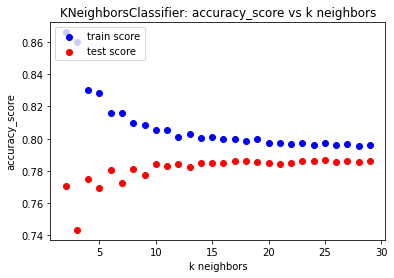

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

parameter_knn_min = 2
parameter_knn_max = 30
preds_knn_train=[]
preds_knn_test=[]
for k in range(parameter_knn_min,parameter_knn_max):
    cl_knn = KNeighborsClassifier(n_neighbors = k)
    knn_model = cl_knn.fit(X_train, y_train)
    y_hat_dtree_train = knn_model.predict(X_train)
    y_hat_dtree_test = knn_model.predict(X_test)
    preds_knn_train.append(accuracy_score(y_train,y_hat_dtree_train))
    preds_knn_test.append(accuracy_score(y_test,y_hat_dtree_test))
    #print(k,"Train accuracy_score",preds_train[-1])
    #print(k,"Test accuracy_score",preds_test[-1],"\n")

plt.scatter(range(parameter_knn_min,parameter_knn_max),preds_knn_train,c="b",label="train score")
plt.scatter(range(parameter_knn_min,parameter_knn_max),preds_knn_test,c="r",label="test score")
plt.legend(loc="upper left")
plt.title('KNeighborsClassifier: accuracy_score vs k neighbors')
plt.xlabel('k neighbors')
plt.ylabel('accuracy_score')
plt.savefig('KNeighborsClassifier.png')
plt.show()

In [10]:
#present k with best score for evaluation dataset
max_knn_index = preds_knn_test.index(max(preds_knn_test))
best_k = list(range(parameter_knn_min,parameter_knn_max))[max_knn_index]
cl_knn = KNeighborsClassifier(n_neighbors = best_k)
knn_model = cl_knn.fit(X_train,y_train)
y_hat_dtree_train = knn_model.predict(X_train)
y_hat_dtree_test = knn_model.predict(X_test)
y_hat_dtree_evaluate = knn_model.predict(X_evaluate)
print("k="+str(best_k),"Train accuracy_score",accuracy_score(y_train,y_hat_dtree_train))
print("k="+str(best_k),"Test accuracy_score",accuracy_score(y_test,y_hat_dtree_test))
print("k="+str(best_k),"Evaluation accuracy_score",accuracy_score(y_evaluate,y_hat_dtree_evaluate),"\n")

k=25 Train accuracy_score 0.7970491939160347
k=25 Test accuracy_score 0.7870048068954086
k=25 Evaluation accuracy_score 0.7928286852589641 



In [3]:
%run main.py

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


*************************************************
Searching best Depth for Decision Tree Classifier
************************************************* 

***************************************************
Searching best K for K-Nearest Neighbors Classifier
*************************************************** 

*********************************************
Evaluate Decision Tree Classifier on new data
********************************************* 

depth=8 Train accuracy_score 0.8356749140038957
depth=8 Test accuracy_score 0.832587435769932
depth=8 Evaluation accuracy_score 0.8287516600265604 

***********************************
Evaluate KNN Classifier on new data
*********************************** 

k=23 Train accuracy_score 0.7969248621990136
k=23 Test accuracy_score 0.7876678269517653
k=23 Evaluation accuracy_score 0.7931606905710491 

